# Importing libraries

In [29]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    classification_report, confusion_matrix,
    roc_auc_score
)
import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression



In [30]:
file_path = "preprocessed_rural_financial_data.csv"  
df = pd.read_csv(file_path, sep=";")

# Analysis of the different categories and types of variables

In [32]:
print("Dimensions :", df.shape)
df.head()


for nb, col in enumerate(df.columns):
    print(col, df[col].dtype)

print(df.head())



Dimensions : (10293, 21)
Bank_ID int64
Capital_Asset_Pricing_Model float64
Equities float64
Insurance_Coverage float64
Loan_Amounts float64
Deposit_Amount float64
Risk_Factor_Equities float64
Risk_Factor_Loans float64
Bank_Assets float64
Bank_Liabilities float64
Liquidity_Ratio float64
Capital_Ratio float64
Operating_Cost float64
Financial_Leverage float64
Agricultural_Performance float64
Economic_Indicators float64
Natural_Disasters float64
Employment_Rate float64
Inflation_Rate float64
Credit_Risk float64
Systemic_Risk_Level int64
   Bank_ID  Capital_Asset_Pricing_Model  Equities  Insurance_Coverage  \
0        1                     0.374639  0.677191            0.417229   
1        2                     0.950982  0.483994            0.534461   
2        3                     0.732198  0.978340            0.965929   
3        4                     0.598823  0.874150            0.005193   
4        5                     0.156053  0.358997            0.284105   

   Loan_Amounts  Depos

In [33]:
# To verify the duplication
print("Number of repetition : " , df.duplicated().sum())

Number of repetition :  0


In [34]:
# To verify the number of NA
print(df.isna().sum())


Bank_ID                        0
Capital_Asset_Pricing_Model    0
Equities                       0
Insurance_Coverage             0
Loan_Amounts                   0
Deposit_Amount                 0
Risk_Factor_Equities           0
Risk_Factor_Loans              0
Bank_Assets                    0
Bank_Liabilities               0
Liquidity_Ratio                0
Capital_Ratio                  0
Operating_Cost                 0
Financial_Leverage             0
Agricultural_Performance       0
Economic_Indicators            0
Natural_Disasters              0
Employment_Rate                0
Inflation_Rate                 0
Credit_Risk                    0
Systemic_Risk_Level            0
dtype: int64


In [35]:
print("General Information :")
df.info()

General Information :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10293 entries, 0 to 10292
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Bank_ID                      10293 non-null  int64  
 1   Capital_Asset_Pricing_Model  10293 non-null  float64
 2   Equities                     10293 non-null  float64
 3   Insurance_Coverage           10293 non-null  float64
 4   Loan_Amounts                 10293 non-null  float64
 5   Deposit_Amount               10293 non-null  float64
 6   Risk_Factor_Equities         10293 non-null  float64
 7   Risk_Factor_Loans            10293 non-null  float64
 8   Bank_Assets                  10293 non-null  float64
 9   Bank_Liabilities             10293 non-null  float64
 10  Liquidity_Ratio              10293 non-null  float64
 11  Capital_Ratio                10293 non-null  float64
 12  Operating_Cost               10293 non-null  float64

In [36]:
df.describe().T


,count,mean,std,min,25%,50%,75%,max
Bank_ID,10293.0,5147.000000,2971.477494,1.0,2574.000000,5147.000000,7720.000000,10293.0
Capital_Asset_Pricing_Model,10293.0,0.494100,0.287769,0.0,0.245879,0.492655,0.739787,1.0
Equities,10293.0,0.504692,0.289071,0.0,0.254528,0.505943,0.756571,1.0
Insurance_Coverage,10293.0,0.496534,0.287561,0.0,0.246610,0.497040,0.743551,1.0
Loan_Amounts,10293.0,0.501480,0.289619,0.0,0.248773,0.503221,0.754635,1.0
Deposit_Amount,10293.0,0.502676,0.288011,0.0,0.251204,0.501312,0.753415,1.0
Risk_Factor_Equities,10293.0,0.502216,0.287371,0.0,0.254672,0.502280,0.749952,1.0
Risk_Factor_Loans,10293.0,0.504944,0.289573,0.0,0.255461,0.503976,0.760238,1.0
Bank_Assets,10293.0,0.500891,0.289019,0.0,0.245988,0.503213,0.751339,1.0
Bank_Liabilities,10293.0,0.497319,0.288780,0.0,0.246761,0.498054,0.749048,1.0


In [37]:
df = df.loc[:, df.isnull().mean() < 0.3]
df.drop_duplicates(inplace=True)

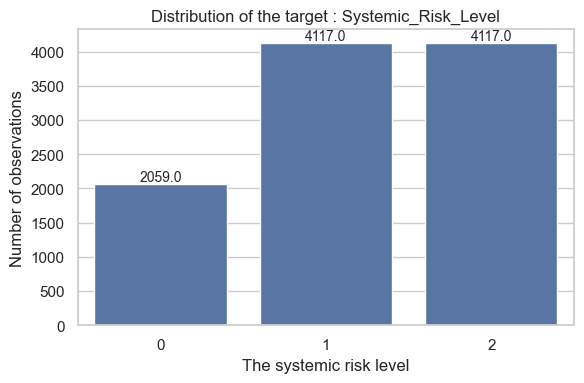

In [38]:
sns.set(style="whitegrid", context="notebook")
# To print the distribution of the target
plt.figure(figsize=(6, 4))
ax = sns.countplot(data=df, x='Systemic_Risk_Level', order=[0, 1, 2])
plt.title("Distribution of the target : Systemic_Risk_Level")
plt.xlabel("The systemic risk level")
plt.ylabel("Number of observations")

# To print values in the hist
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', 
                (p.get_x() + p.get_width() / 2., height), 
                ha='center', va='bottom', fontsize=10)
    
    
plt.tight_layout()
plt.show()



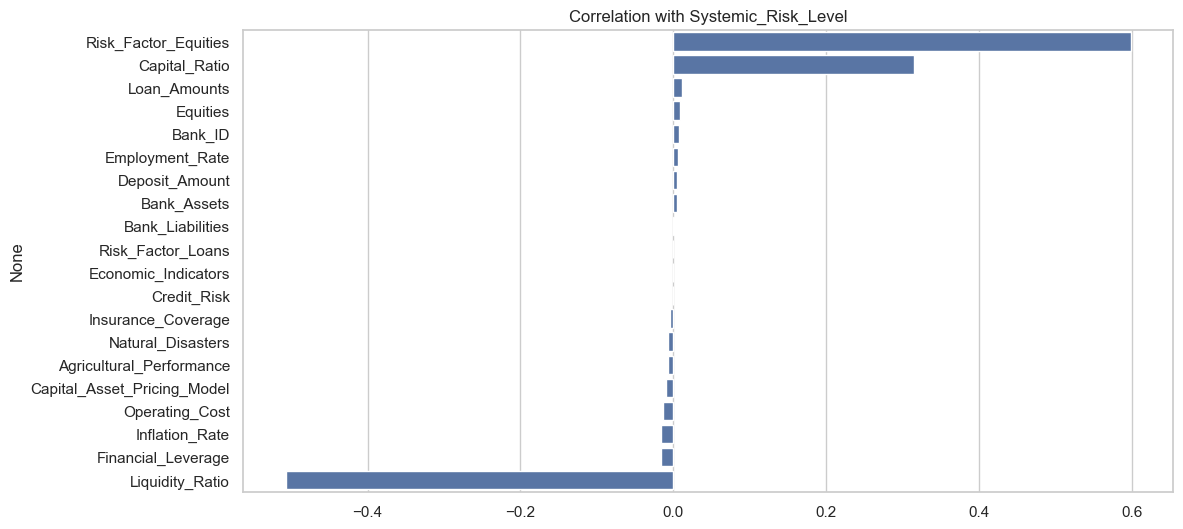

In [39]:
plt.figure(figsize=(12, 6))
corr = df.corr(numeric_only=True)['Systemic_Risk_Level'].drop(['Systemic_Risk_Level']).sort_values(ascending=False)
sns.barplot(x=corr.values, y=corr.index)
plt.title("Correlation with Systemic_Risk_Level")
plt.show()


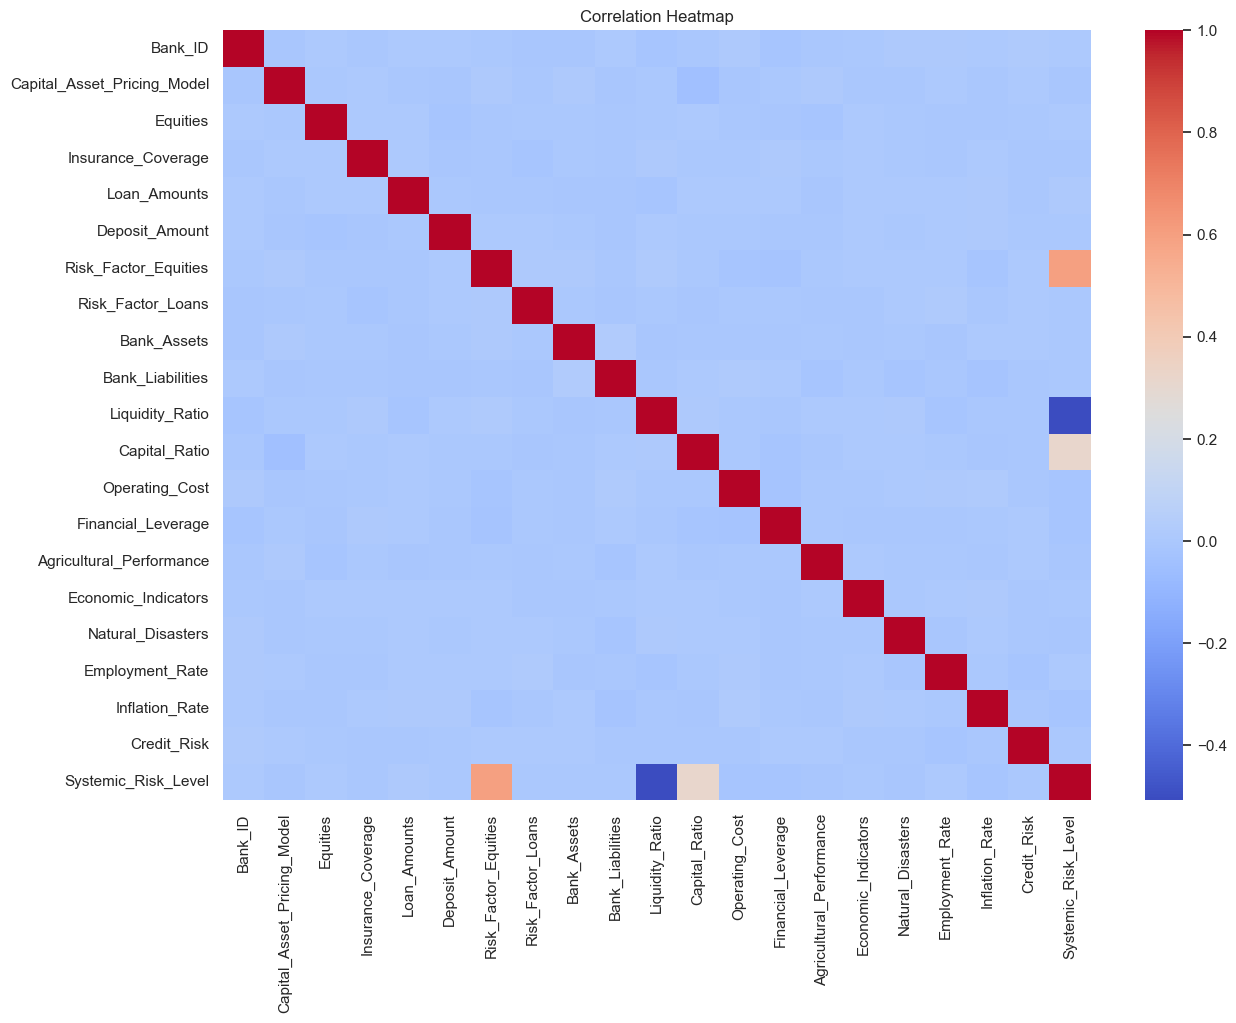

In [40]:

plt.figure(figsize=(14, 10))
sns.heatmap(df.corr(numeric_only=True), cmap="coolwarm", annot=False)
plt.title("Correlation Heatmap")
plt.show()


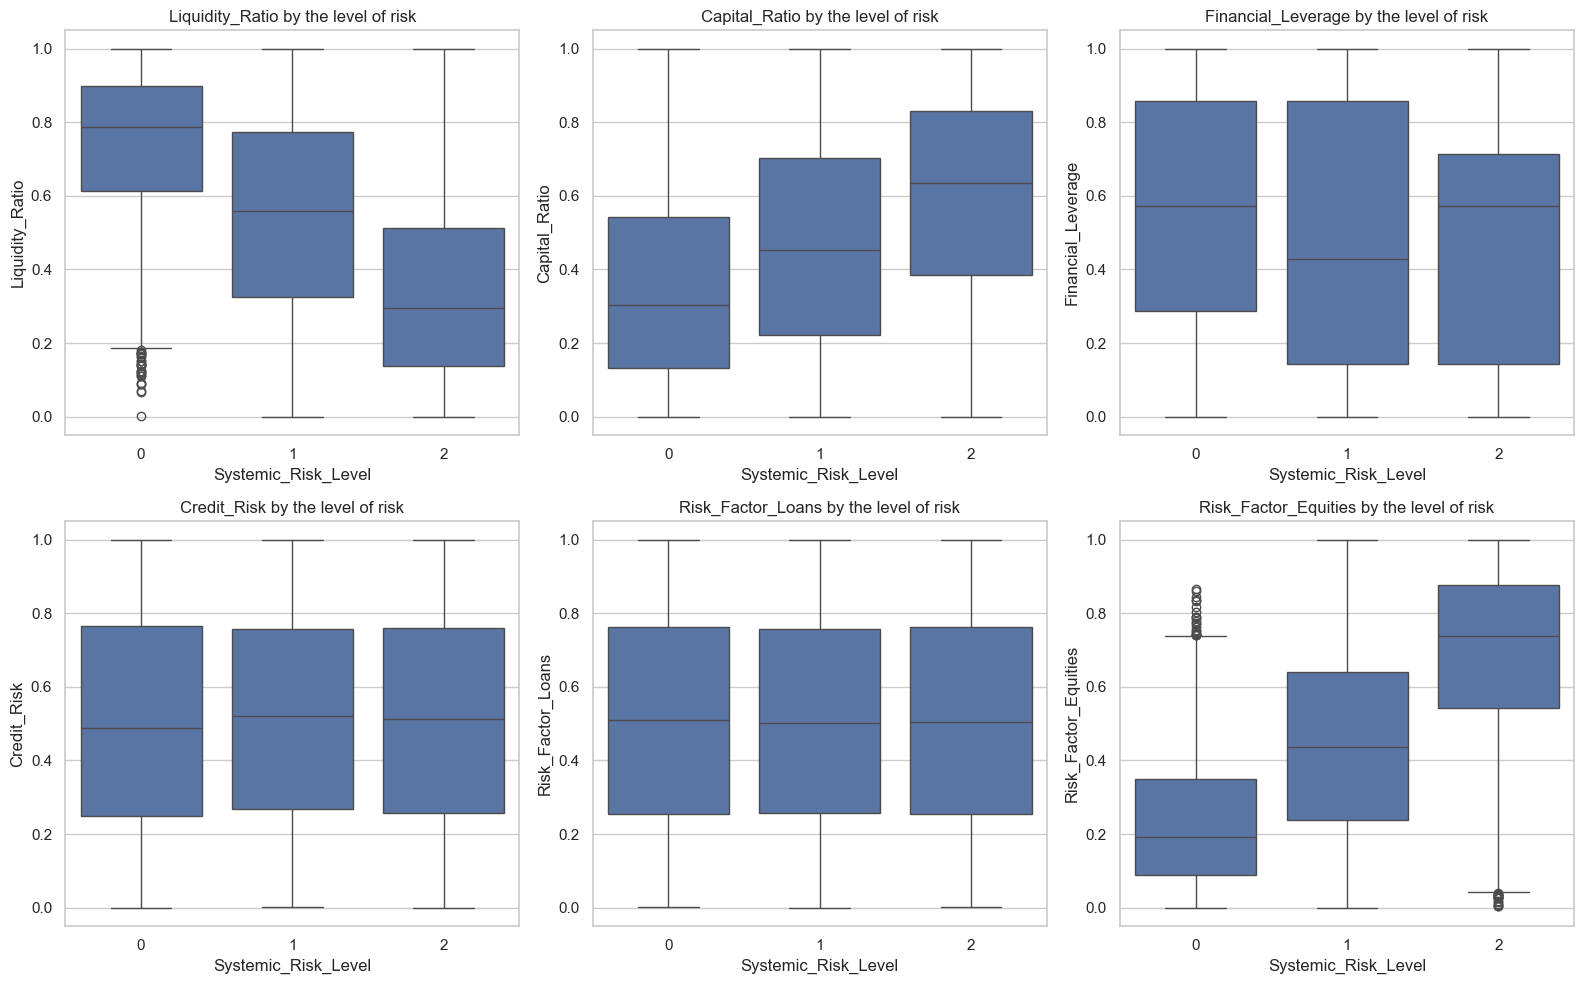

In [41]:
features = [
    "Liquidity_Ratio",
    "Capital_Ratio",
    "Financial_Leverage",
    "Credit_Risk",
    "Risk_Factor_Loans",
    "Risk_Factor_Equities"
]

plt.figure(figsize=(16, 10))

for i, col in enumerate(features, 1):
    if col in df.columns:
        plt.subplot(2, 3, i)
        sns.boxplot(data=df, x='Systemic_Risk_Level', y=col, order=[0, 1, 2])
        plt.title(f"{col} by the level of risk")
        plt.xlabel("Systemic_Risk_Level")
        plt.ylabel(col)

plt.tight_layout()
plt.show()


Numeric columns: ['Bank_ID', 'Capital_Asset_Pricing_Model', 'Equities', 'Insurance_Coverage', 'Loan_Amounts', 'Deposit_Amount', 'Risk_Factor_Equities', 'Risk_Factor_Loans', 'Bank_Assets', 'Bank_Liabilities', 'Liquidity_Ratio', 'Capital_Ratio', 'Operating_Cost', 'Financial_Leverage', 'Agricultural_Performance', 'Economic_Indicators', 'Natural_Disasters', 'Employment_Rate', 'Inflation_Rate', 'Credit_Risk', 'Systemic_Risk_Level']


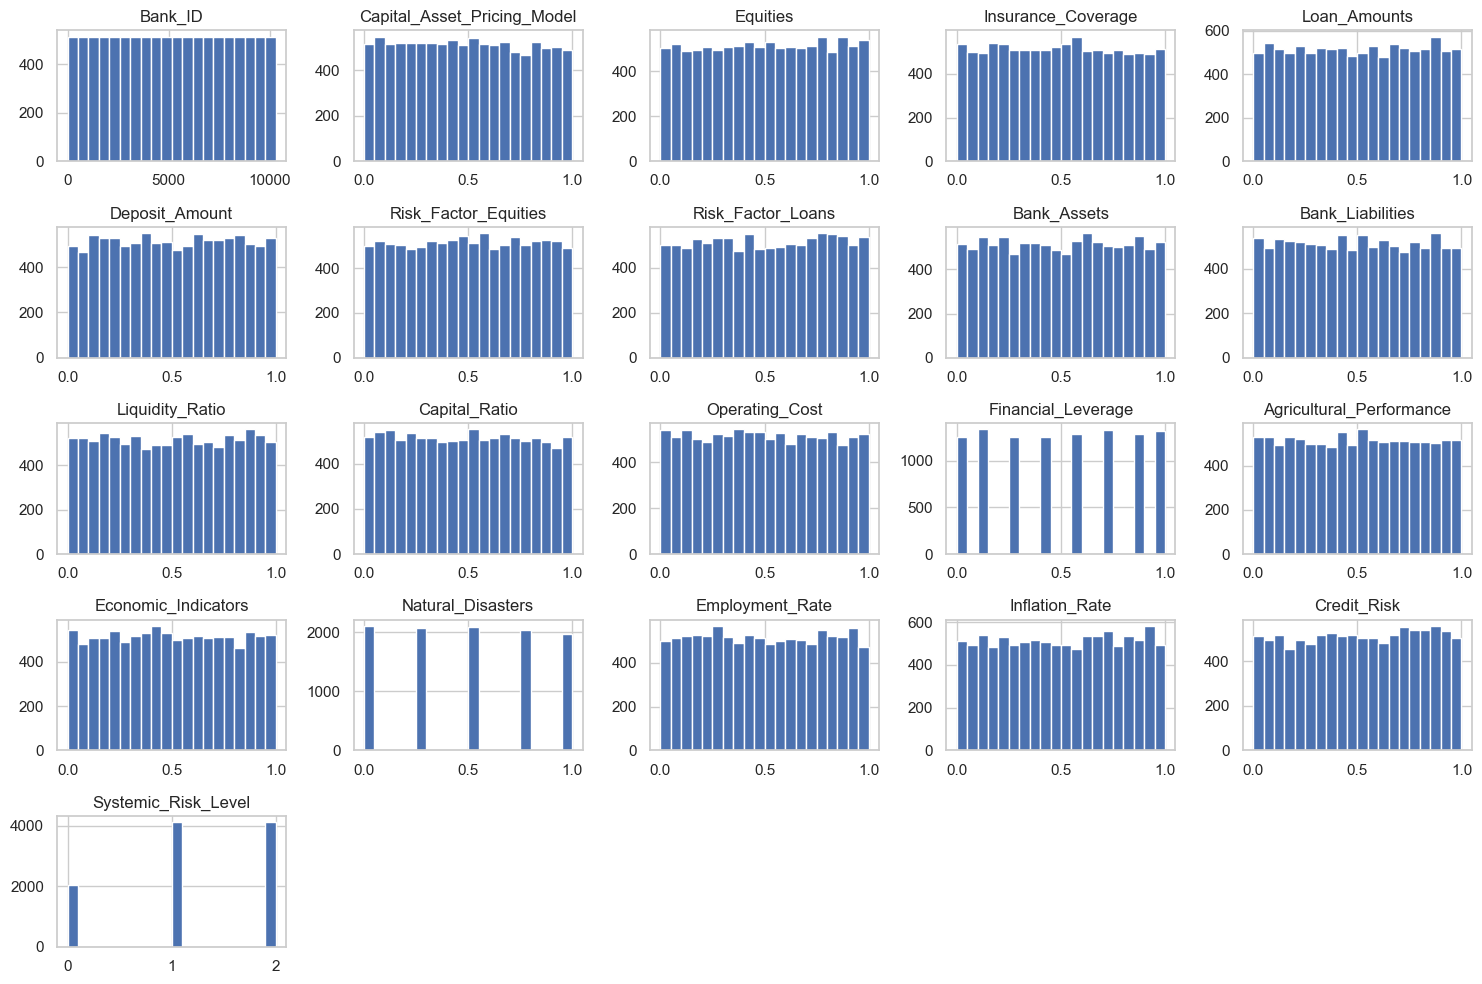

In [42]:
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
print('\nNumeric columns:', numeric_cols)
df[numeric_cols].hist(bins=20, figsize=(15, 10))
plt.tight_layout()
plt.show()

In [43]:
X = df.drop(columns=["Systemic_Risk_Level"], axis = 1)
y = df["Systemic_Risk_Level"]

# Implementation of Logistic Regression Model without SMOTE

In [45]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y    
)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LogisticRegression(
    multi_class='multinomial',
    solver='lbfgs',
    max_iter=1000
)
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)
y_proba = model.predict_proba(X_test_scaled)

In [46]:
print("\n LOGISTIC REGRESSION")
print("\n Classification Report")
print(classification_report(y_test, y_pred, digits=3))

print("\n Confusion Matrix")
print(confusion_matrix(y_test, y_pred))

print("\n ROC-AUC")
print(roc_auc_score(y_test, y_proba, multi_class='ovr', average='macro'))


 LOGISTIC REGRESSION

 Classification Report
              precision    recall  f1-score   support

           0      0.811     0.782     0.796       412
           1      0.784     0.808     0.796       824
           2      0.898     0.886     0.892       823

    accuracy                          0.834      2059
   macro avg      0.831     0.825     0.828      2059
weighted avg      0.835     0.834     0.834      2059


 Confusion Matrix
[[322  90   0]
 [ 75 666  83]
 [  0  94 729]]

 ROC-AUC
0.9504729617015264


# Implementation of RandomForest Model without SMOTE

In [48]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y    
)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = RandomForestClassifier()
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)
y_proba = model.predict_proba(X_test_scaled)

In [49]:
print("\n Random Forest Classifier")
print("\n Classification Report")
print(classification_report(y_test, y_pred, digits=3))

print("\n Confusion Matrix")
print(confusion_matrix(y_test, y_pred))

print("\n ROC-AUC")
print(roc_auc_score(y_test, y_proba, multi_class='ovr', average='macro'))


 Random Forest Classifier

 Classification Report
              precision    recall  f1-score   support

           0      0.824     0.728     0.773       412
           1      0.744     0.802     0.772       824
           2      0.877     0.860     0.869       823

    accuracy                          0.811      2059
   macro avg      0.815     0.797     0.805      2059
weighted avg      0.813     0.811     0.811      2059


 Confusion Matrix
[[300 112   0]
 [ 64 661  99]
 [  0 115 708]]

 ROC-AUC
0.9365735823441513


# Implementation of RandomForest Model with SMOTE

In [51]:
X = df.drop(columns=["Systemic_Risk_Level"], axis = 1)
y = df["Systemic_Risk_Level"]

In [52]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y    
)

sm = SMOTE(random_state=42, sampling_strategy='auto') 
X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_smote)
X_test_scaled = scaler.transform(X_test)

model = RandomForestClassifier()
model.fit(X_train_scaled, y_train_smote)

y_pred = model.predict(X_test_scaled)
y_proba = model.predict_proba(X_test_scaled)

In [53]:
print("\n Classification Report")
print(classification_report(y_test, y_pred, digits=3))

print("\n Confusion Matrix")
print(confusion_matrix(y_test, y_pred))

print("\n ROC-AUC")
print(roc_auc_score(y_test, y_proba, multi_class='ovr', average='macro'))


 Classification Report
              precision    recall  f1-score   support

           0      0.781     0.772     0.777       412
           1      0.752     0.765     0.758       824
           2      0.871     0.861     0.866       823

    accuracy                          0.805      2059
   macro avg      0.801     0.799     0.800      2059
weighted avg      0.805     0.805     0.805      2059


 Confusion Matrix
[[318  94   0]
 [ 89 630 105]
 [  0 114 709]]

 ROC-AUC
0.9358643673890482


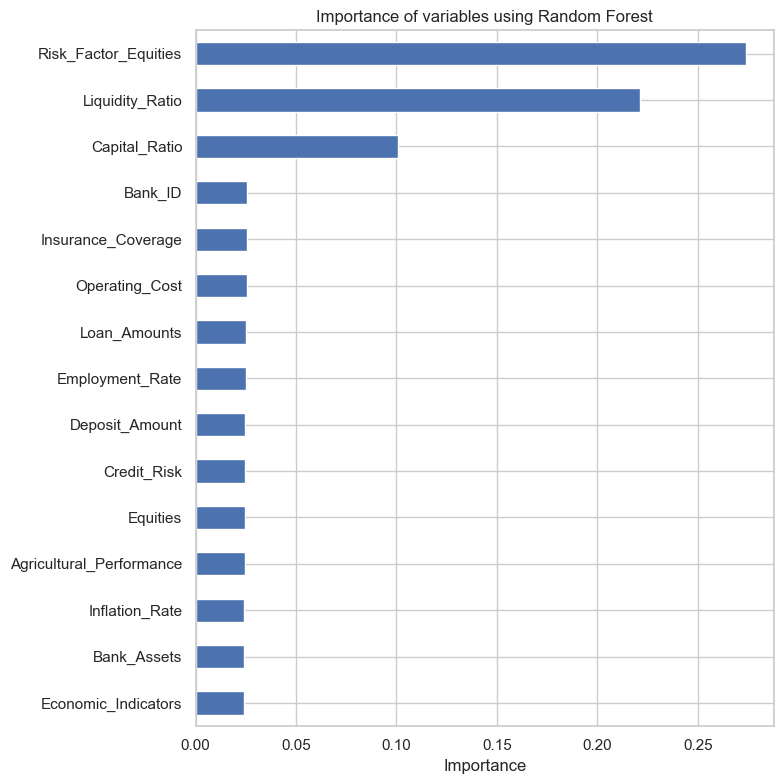

In [54]:
importances = pd.Series(model.feature_importances_, index=X.columns)
importances_sorted = importances.sort_values(ascending=True).tail(15)  # top 15

plt.figure(figsize=(8, 8))
importances_sorted.plot(kind='barh')
plt.title("Importance of variables using Random Forest")
plt.xlabel("Importance")
plt.tight_layout()
plt.show()

## Next Steps
- We will go from a multinomial problem to a binomial problem and we will apply a hyperparameter to tune down the number of false negative
  

In [56]:
# conversion

df["Systemic_Risk_Level_Binary"] = df["Systemic_Risk_Level"].replace({
    0: 0,
    1: 1,
    2: 1
})

df["Systemic_Risk_Level_Binary"].value_counts()

Systemic_Risk_Level_Binary
1    8234
0    2059
Name: count, dtype: int64

In [57]:
X = df.drop(["Systemic_Risk_Level", "Systemic_Risk_Level_Binary"], axis=1)
y = df["Systemic_Risk_Level_Binary"]


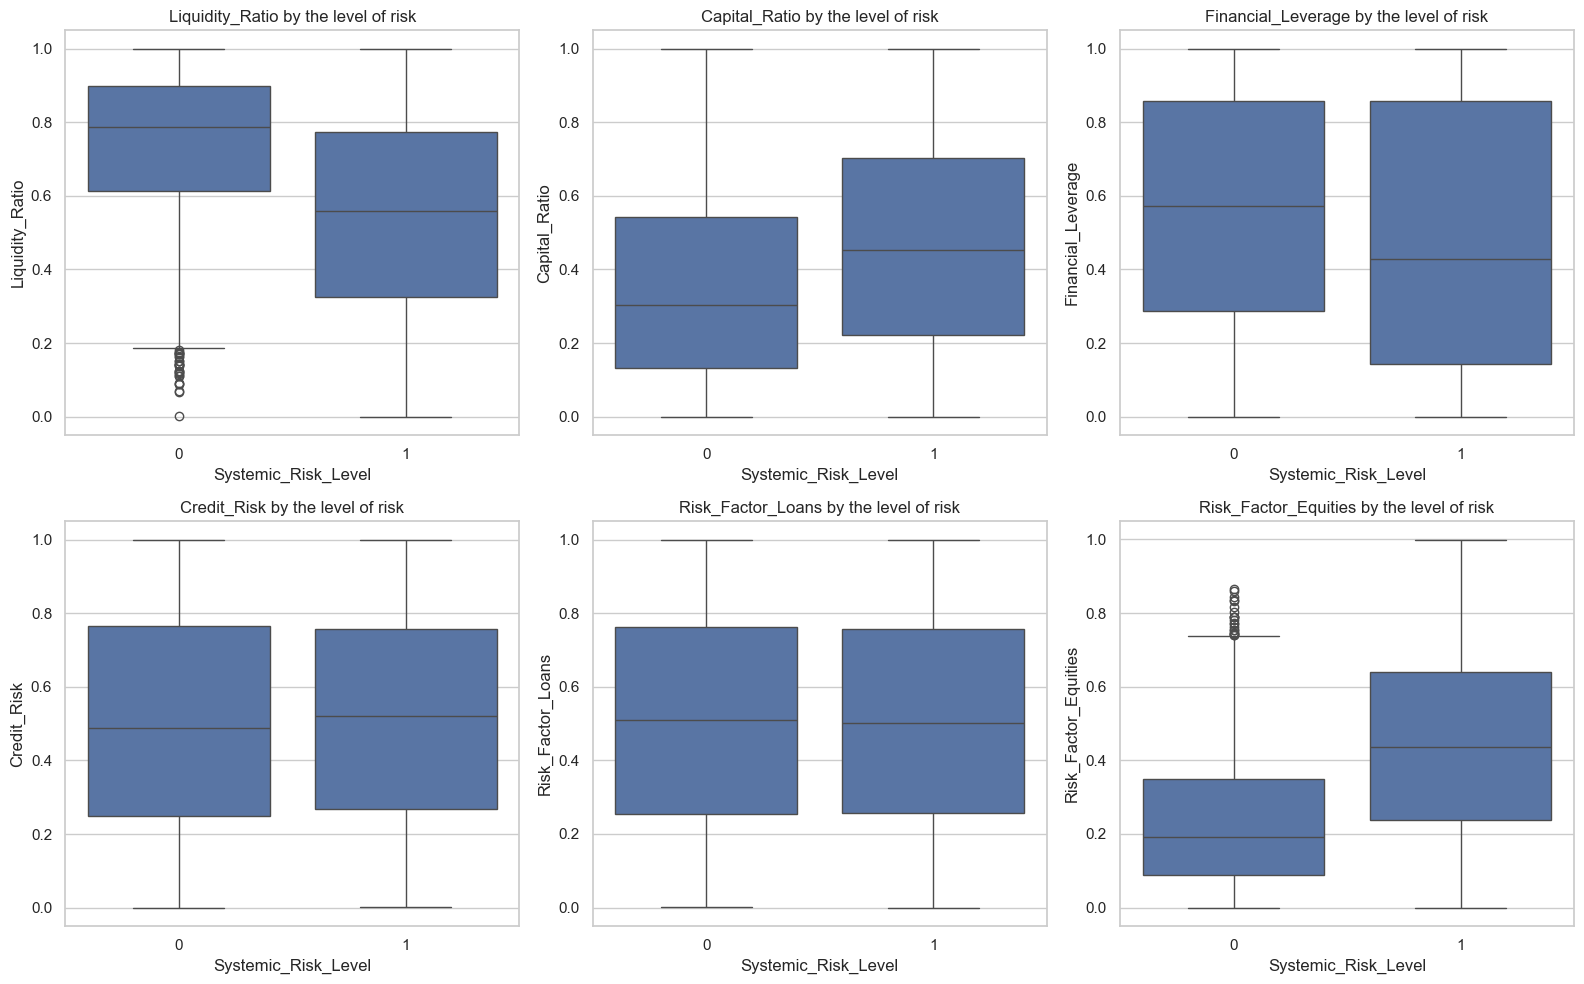

In [58]:
features = [
    "Liquidity_Ratio",
    "Capital_Ratio",
    "Financial_Leverage",
    "Credit_Risk",
    "Risk_Factor_Loans",
    "Risk_Factor_Equities"
]

plt.figure(figsize=(16, 10))

for i, col in enumerate(features, 1):
    if col in df.columns:
        plt.subplot(2, 3, i)
        sns.boxplot(data=df, x='Systemic_Risk_Level', y=col, order=[0, 1])
        plt.title(f"{col} by the level of risk")
        plt.xlabel("Systemic_Risk_Level")
        plt.ylabel(col)

plt.tight_layout()
plt.show()

In [59]:
sm = SMOTE(random_state=42)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y    
)
X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)

print("Before SMOTE :", y_train.value_counts())
print("After SMOTE :", y_train_sm.value_counts())

scaler = StandardScaler()
X_train_sm_scaled = scaler.fit_transform(X_train_sm)
X_test_sm_scaled = scaler.transform(X_test)

Before SMOTE : Systemic_Risk_Level_Binary
1    6587
0    1647
Name: count, dtype: int64
After SMOTE : Systemic_Risk_Level_Binary
1    6587
0    6587
Name: count, dtype: int64


In [60]:
log_reg = LogisticRegression(
    solver="lbfgs",
    max_iter=2000,
    class_weight="balanced"
)

log_reg.fit(X_train_sm_scaled, y_train_sm)
y_pred_lr = log_reg.predict(X_test_sm_scaled)
y_proba_lr = log_reg.predict_proba(X_test_sm_scaled)

print("\n Classification Report")
print(classification_report(y_test, y_pred_lr))

print("\n Confusion Matrix")
print(confusion_matrix(y_test, y_pred_lr))



 Classification Report
              precision    recall  f1-score   support

           0       0.72      0.90      0.80       412
           1       0.97      0.91      0.94      1647

    accuracy                           0.91      2059
   macro avg       0.84      0.90      0.87      2059
weighted avg       0.92      0.91      0.91      2059


 Confusion Matrix
[[ 369   43]
 [ 147 1500]]


In [61]:
rf = RandomForestClassifier(
    n_estimators=300,
    max_depth=None,
    random_state=42
)

rf.fit(X_train_sm_scaled, y_train_sm)

y_pred_rf = rf.predict(X_test_sm_scaled)
print(confusion_matrix(y_test, y_pred_rf))

[[ 335   77]
 [ 107 1540]]


In [62]:
from xgboost import XGBClassifier

model = XGBClassifier(
    objective='binary:logistic',  
    eval_metric='logloss',        
    n_estimators=100,             
    max_depth=3,                  
    learning_rate=0.1,            
    random_state=42,
)

# Entraînement
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, ...)

In [63]:
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]  
print("\n Classification Report")
print(classification_report(y_test, y_pred))

print("\n Confusion Matrix")
print(confusion_matrix(y_test, y_pred))

auc = roc_auc_score(y_test, y_pred_proba)

print(f"AUC: {auc:.4f}")


 Classification Report
              precision    recall  f1-score   support

           0       0.81      0.78      0.79       412
           1       0.95      0.95      0.95      1647

    accuracy                           0.92      2059
   macro avg       0.88      0.87      0.87      2059
weighted avg       0.92      0.92      0.92      2059


 Confusion Matrix
[[ 321   91]
 [  76 1571]]
AUC: 0.9698


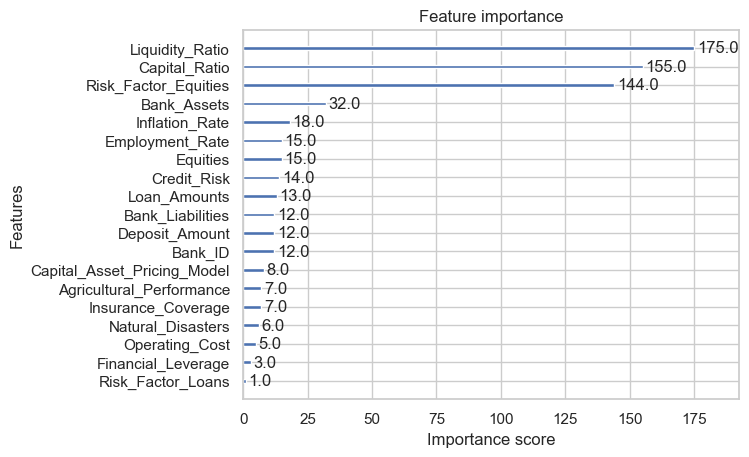

In [64]:
from xgboost import plot_importance

plot_importance(model)
plt.show()

In [65]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, recall_score

X = df.drop(['Systemic_Risk_Level','Systemic_Risk_Level_Binary'], axis=1)
y = df['Systemic_Risk_Level_Binary']


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Weight for positive class
pos_weight = sum(y == 0) / sum(y == 1)


xgb = XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',
    random_state=42
)

# Gridsearch for hyperparameters
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5, 6],
    'learning_rate': [0.01, 0.05, 0.1],
    'scale_pos_weight': [1, pos_weight]
}

# Maximise the recall to lessen false negatives
scorer = make_scorer(recall_score)

grid_search = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    scoring=scorer,
    cv=5,
    n_jobs=-1,
    verbose=2
)


grid_search.fit(X_train, y_train)


print("Best params:", grid_search.best_params_)

# Evaluation on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Recall to verify the false negatives
recall = recall_score(y_test, y_pred)
print(f"Recall: {recall:.4f}")


Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best params: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100, 'scale_pos_weight': 1}
Confusion Matrix:
[[ 168  244]
 [  11 1636]]
Recall: 0.9933


### Final Model


 Classification Report
              precision    recall  f1-score   support

           0       0.94      0.41      0.57       412
           1       0.87      0.99      0.93      1647

    accuracy                           0.88      2059
   macro avg       0.90      0.70      0.75      2059
weighted avg       0.88      0.88      0.86      2059


 Confusion Matrix
[[ 168  244]
 [  11 1636]]
AUC: 0.9537


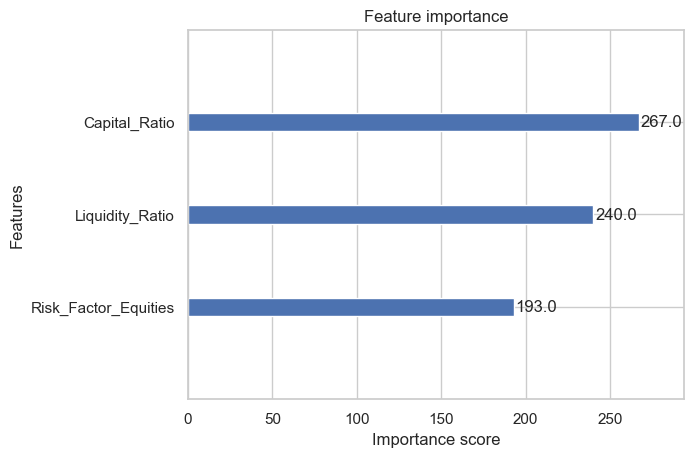

In [67]:
model = XGBClassifier(
    objective='binary:logistic',  
    eval_metric='logloss',        
    n_estimators=100,             
    max_depth=3,                  
    learning_rate=0.01,            
    random_state=42,
    scale_pos_weight=1
)


model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]  
print("\n Classification Report")
print(classification_report(y_test, y_pred))

print("\n Confusion Matrix")
print(confusion_matrix(y_test, y_pred))

auc = roc_auc_score(y_test, y_pred_proba)

print(f"AUC: {auc:.4f}")

plot_importance(model)
plt.show()

## Synthesis

# The latest model evaluation shows strong ability to detect high-risk institutions:

- Very few false negatives (11 only) → crucial for systemic risk detection
- Higher false positives on low/medium risk (244) → model prioritizes safety by erring on the side of caution

The model is highly effective at detecting true high-risk institutions, which is the primary objective for supervisory and regulatory usage.
The trade-off is an elevated number of false alerts for lower-risk institutions, which is acceptable in contexts where missing a high-risk case is far more costly than over-reporting.

# Benefits

- Early detection of systemic vulnerabilities
- Improved supervision and decision-making
- Reduced probability of financial crises through timely intervention
- Enhanced resilience of rural financial institutions facing economic, climatic, and credit-related uncertainties

